## CCTV 개수 등 정량적 기준과 서울시 예산 비교하기

2024년 8월 10일 데이터 분석 자습/실습 

* CCTV가 많은 구와 적은 구 출력
* 인구 내 외국인, 고령자 비율 대비 CCTV 비율이 높은 구와 낮은 구 간의 예산 비교
* 구별로 범죄율의 높낮음이 예산에 미치는 영향이 있는지 점검
* 나아가: CCTV가 많이 설치된 구는 예산도 많이 배정되는지를 확인, 이유를 분석한다 

In [1]:
import pandas as pd
import numpy as np
import platform

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unable to acknowldege system. Maybe Linux?')

In [2]:
SeoulCCTV = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8')
SeoulCCTV.rename(columns={SeoulCCTV.columns[0] : '구별'}, inplace=True)

In [3]:
SeoulPops = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')

SeoulPops.rename(columns={SeoulPops.columns[0] : '구별', 
                          SeoulPops.columns[1] : '인구수', 
                          SeoulPops.columns[2] : '한국인', 
                          SeoulPops.columns[3] : '외국인', 
                          SeoulPops.columns[4] : '고령자'}, inplace=True)

SeoulPops.drop([0], inplace=True)
SeoulPops = SeoulPops.drop(SeoulPops.index[-1])

In [4]:
SeoulPops['외국인비율'] = SeoulPops['외국인'] / SeoulPops['인구수'] * 100
SeoulPops['고령자비율'] = SeoulPops['고령자'] / SeoulPops['인구수'] * 100
SeoulPops.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [5]:
SeoulBudget = pd.read_csv('../data/00. Seoul_Annual_Budget.csv', header = 2, usecols = ['B', 'C', 'F', 'I'], encoding='utf-8')
SeoulBudget.columns = ['구별', '총예산', '세출', '세입']
SeoulBudget.head()

,구별,총예산,세출,세입
0,자치구별(2),예산현액,세입,세출
1,자치구별(2),계,계,계
2,소계,"80,797,281","84,378,232","73,233,977"
3,본청,"53,468,799","55,571,683","50,276,587"
4,자치구,"27,328,481","28,806,549","22,957,390"


In [6]:
if(len(SeoulCCTV['구별'].unique()) == len(SeoulPops['구별'].unique())):
    print('구별 컬럼이 일치합니다.')
else:
    print('구별 컬럼이 일치하지 않습니다.')
    
SeoulPrep = pd.merge(SeoulCCTV, SeoulPops, on='구별')
SeoulPrep.head()

구별 컬럼이 일치합니다.


,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [7]:
del SeoulPrep['2013년도 이전']
del SeoulPrep['2014년']
del SeoulPrep['2015년']
del SeoulPrep['2016년']

In [8]:
SeoulPrep.rename(columns={SeoulPrep.columns[1] : 'CCTV'}, inplace=True)
SeoulPrep.head()

,구별,CCTV,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [9]:
SeoulBudget.sort_values(by='구별', ascending=True, inplace=True)
SeoulBudget.head()

,구별,총예산,세출,세입
27,강남구,"1,499,273","1,652,978","1,250,825"
29,강동구,"1,237,844","1,289,018","1,049,127"
13,강북구,"1,059,703","1,127,810","910,812"
20,강서구,"1,439,528","1,476,278","1,277,854"
25,관악구,"1,254,073","1,307,239","1,097,285"


In [15]:
SeoulData = pd.merge(SeoulPrep, SeoulBudget, on='구별')
del SeoulData['세입']
del SeoulData['세출']
SeoulData.head()

,구별,CCTV,인구수,한국인,외국인,고령자,외국인비율,고령자비율,총예산
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,"1,499,273"
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,"1,237,844"
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,"1,059,703"
3,강서구,884,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,"1,439,528"
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,"1,254,073"


In [17]:
# read csv file '02. crime_norm_shorter.csv' and name it SeoulCrime
SeoulCrime = pd.read_csv('../data/02. crime_norm_shorter.csv', encoding='utf-8')

# delete every coluns except '구별' and '범죄'
SeoulCrime = SeoulCrime[['구별', '범죄']]
SeoulCrime.head()

,구별,범죄
0,강남구,4.472701
1,강동구,1.116551
2,강북구,1.494746
3,관악구,2.613667
4,광진구,2.034438


In [23]:
# rename row '총예산' to '예산(만원)'
SeoulData.rename(columns={SeoulData.columns[8] : '예산(만원)'}, inplace=True)
SeoulData.head()

,구별,CCTV,인구수,한국인,외국인,고령자,외국인비율,고령자비율,예산(만원),범죄
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,"1,499,273",4.472701
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,"1,237,844",1.116551
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,"1,059,703",1.494746
3,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,"1,254,073",2.613667
4,광진구,707,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,"987,742",2.034438


In [25]:
# merge SeoulData with SeoulCrime on '구별'
SeoulData = pd.merge(SeoulData, SeoulCrime, on='구별')

# drop additional '범죄' columns
# del SeoulData['범죄_x']
# del SeoulData['범죄_y']

SeoulData.head()

,구별,CCTV,인구수,한국인,외국인,고령자,외국인비율,고령자비율,예산(만원),범죄
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,"1,499,273",4.472701
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,"1,237,844",1.116551
2,강북구,748,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,"1,059,703",1.494746
3,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,"1,254,073",2.613667
4,광진구,707,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,"987,742",2.034438


In [ ]:
# make another dataframe Seouldata_sortCri, which contains sorted SeoulData by '범죄' in descending order
SeoulData_sortCri = SeoulData.sort_values(by='범죄', ascending=False)
SeoulData_sortCri

In [ ]:
SeoulData.sort_values(by='외국인비율', ascending=False, inplace=True)
SeoulData

In [ ]:
SeoulData.sort_values(by='고령자비율', ascending=False, inplace=True)
SeoulData

In [27]:
# making values 예산(만원) into int type, so that it can be sorted by the value correctly

SeoulData['예산(만원)'] = SeoulData['예산(만원)'].str.replace(',', '')
SeoulData['예산(만원)'] = SeoulData['예산(만원)'].astype(int)
SeoulData_sortBudget = SeoulData.sort_values(by='예산(만원)', ascending=False)
SeoulData_sortBudget

,구별,CCTV,인구수,한국인,외국인,고령자,외국인비율,고령자비율,예산(만원),범죄
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1499273,4.472701
7,노원구,1265,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,1462782,1.736946
20,은평구,1873,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,1313318,1.069920
16,송파구,618,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,1307577,2.732611
3,관악구,1496,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,1254073,2.613667
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,1237844,1.116551
15,성북구,1464,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062,1234720,0.806061
5,구로구,1561,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,1154912,2.398678
17,양천구,2034,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,1137885,4.297113
23,중랑구,660,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,1136415,2.202900


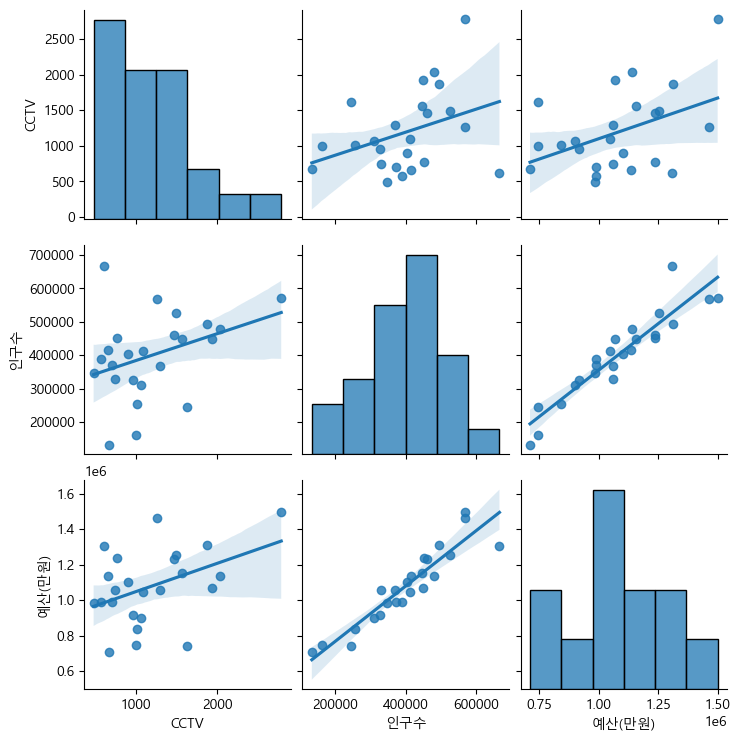

In [51]:
import seaborn as sns

sns.pairplot(SeoulData, vars=['CCTV', '인구수', '예산(만원)'], kind='reg')
plt.show()

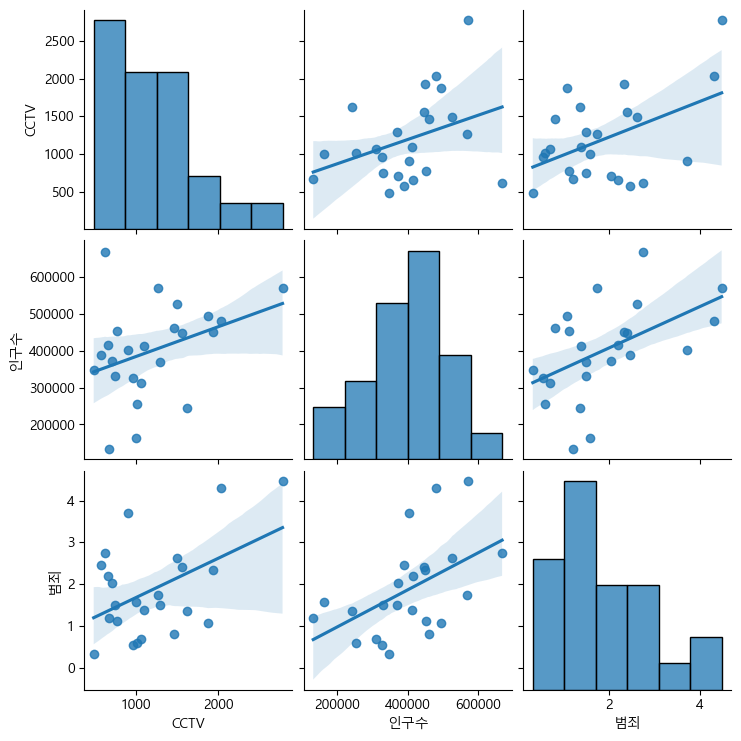

In [50]:
sns.pairplot(SeoulData, vars=['CCTV', '인구수', '범죄'], kind='reg')
plt.show()

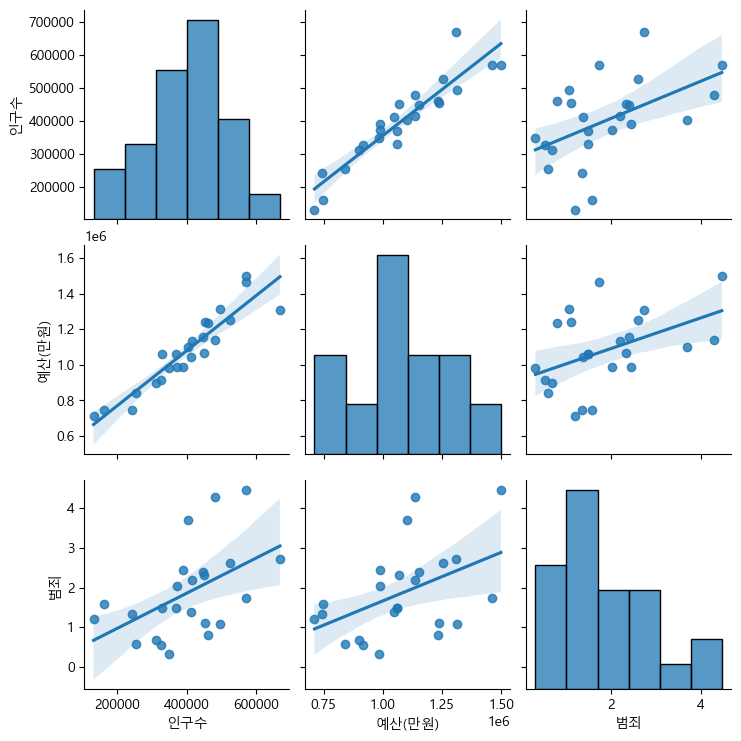

In [52]:
sns.pairplot(SeoulData, vars=['인구수', '예산(만원)', '범죄'], kind='reg')
plt.show()

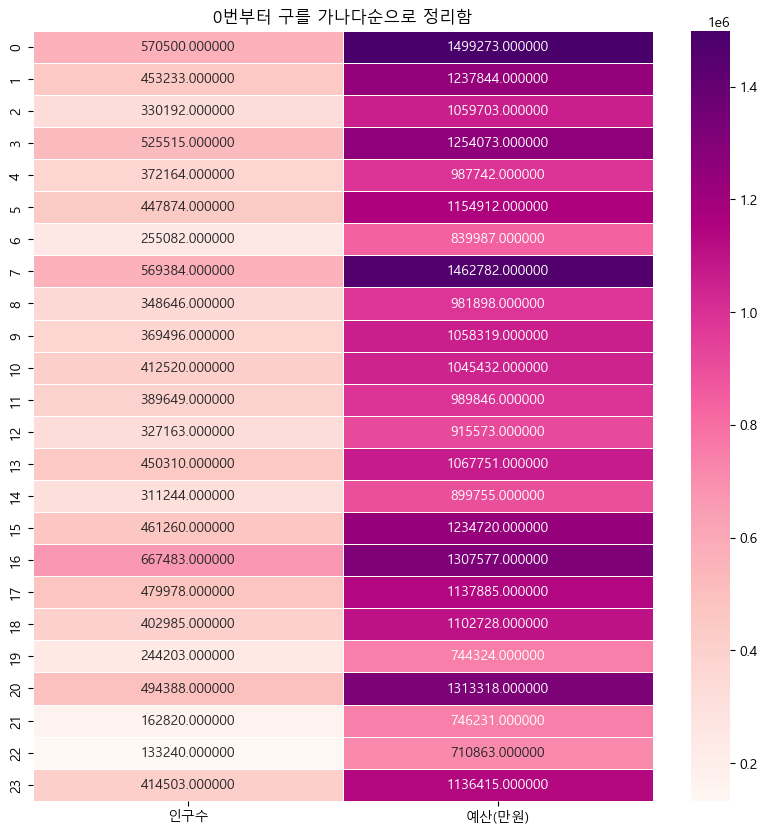

In [58]:
# make a hitmap of SeoulData using "범죄" via seaborn

target_col = ["인구수", "예산(만원)"]

plt.figure(figsize = (10,10))
sns.heatmap(SeoulData[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('0번부터 구를 가나다순으로 정리함')
plt.show()

## 결론 

### 조사 과정 

* 히트맵은 서로 규모가 비슷한 수치를 비교할 때 효율적이다 
* 페어플롯은 각기 다른 변수들 간의 상관관계를 거시적으로 볼 때 유용하다

### 제안사항 1: CCTV가 많은 구는 어떤 이유에서 많은가?

* 많은 인구를 가질 수록 해당 구에선 고령자비율, 외국인 비율, 범죄 발생이 많아지는 추세 
* 인구가 많아질 때는 범죄 발생 건수도 따라서 증가하며, 이를 근거로 CCTV가 많이 설치되었으리라 추정
* CCTV가 범죄 발생을 줄이는 데 실질적 효과가 있는지는 알 수 없음
* 오히려 범죄를 줄이는 것은 서울에 집중된 인구를 분산시키는 것과 연관이 있을 수 있다  

### 제안사항 2: CCTV를 더 설치한다면 어떤 구에 우선적으로 설치할까?

* (제안사항 1과 연동하여) 이미 인구가 과밀된 지역에 CCTV를 설치하는 것은 비효율적
* 사회안전망이 적은 지역, 고령층 인구나 외국인 등 저연령층/내국인에 비해 "법적보호를 덜 받는" 사람들을 생각해 설치하는 게 적당
* CCTV 포화 상태는 사실상 감시체계나 다름없다 - 사생활 침해의 소지 있음 

### 향후 과제

* 지도(Googlemaps API 등)를 활용한 심층적 시각화 (단, "CCTV와 범죄", "예산과 범죄"의 관점에 한하여)